In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Data Exploration and Cleaning

In [2]:
# Importing data
traindf = pd.read_csv('./train.csv', index_col = 'Id')
traindft = traindf.copy()
# Dropping columns with very less data
traindft.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Utilities'], axis = 1, inplace = True)
# Converting categorical data for regression
collist = []
for col in traindft.columns:
    if traindf.dtypes[col] == 'object':
        if len(traindf[col].unique()) <= 1:
            traindft.drop([col], axis = 1, inplace = True)
        elif len(traindf[col].unique()) <= 3:
            collist += [col]
        else:
            labels = traindf.groupby(col)['SalePrice'].mean().sort_values().index
            replace_map_comp = {col : {k: v for k, v in zip(labels, list(range(1, len(labels) + 1)))}}
            traindft.replace(replace_map_comp, inplace = True)
traindft = pd.get_dummies(traindft, columns = collist, drop_first = True)
# Removing outliers
traindft.drop(traindft[(traindft['LotFrontage'] > 150) | (traindft['LotArea'] > 50000)].index, axis = 0, inplace = True)
# Dropping missing values
traindft.dropna(inplace = True)
print(traindft.info(), '\n')
traindft.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 1 to 1460
Data columns (total 73 columns):
MSSubClass       1082 non-null int64
MSZoning         1082 non-null int64
LotFrontage      1082 non-null float64
LotArea          1082 non-null int64
LotShape         1082 non-null int64
LandContour      1082 non-null int64
LotConfig        1082 non-null int64
Neighborhood     1082 non-null int64
Condition1       1082 non-null int64
Condition2       1082 non-null int64
BldgType         1082 non-null int64
OverallQual      1082 non-null int64
OverallCond      1082 non-null int64
YearBuilt        1082 non-null int64
YearRemodAdd     1082 non-null int64
RoofStyle        1082 non-null int64
RoofMatl         1082 non-null int64
MasVnrType       1082 non-null float64
MasVnrArea       1082 non-null float64
ExterQual        1082 non-null int64
ExterCond        1082 non-null int64
Foundation       1082 non-null int64
BsmtQual         1082 non-null float64
BsmtCond         1082 non-null flo

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,SaleType,SaleCondition,SalePrice,Street_Pave,Alley_Pave,LandSlope_Mod,LandSlope_Sev,CentralAir_Y,PavedDrive_P,PavedDrive_Y
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,...,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,56.266174,3.699630,69.730129,9701.780037,1.345656,2.046211,1.531423,13.241220,4.754159,4.984288,...,5.383549,4.878928,185354.588725,0.996303,0.033272,0.036969,0.003697,0.946396,0.021257,0.934381
std,42.131741,0.821418,20.926752,4364.512442,0.604274,0.446685,1.037427,6.551443,0.979251,0.283256,...,1.293915,0.861951,80314.435045,0.060717,0.179428,0.188772,0.060717,0.225340,0.144306,0.247730
min,20.000000,1.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,35311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,60.000000,7590.000000,1.000000,2.000000,1.000000,7.000000,5.000000,5.000000,...,5.000000,5.000000,132000.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,50.000000,4.000000,70.000000,9369.500000,1.000000,2.000000,1.000000,13.000000,5.000000,5.000000,...,5.000000,5.000000,165075.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,70.000000,4.000000,80.000000,11314.500000,2.000000,2.000000,1.000000,18.000000,5.000000,5.000000,...,5.000000,5.000000,218907.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,190.000000,5.000000,149.000000,46589.000000,4.000000,4.000000,5.000000,25.000000,9.000000,8.000000,...,9.000000,6.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# Importing data
testdf = pd.read_csv('./test.csv', index_col = 'Id')
testdft = testdf.copy()
# Dropping columns with very less data
testdft.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'GarageQual'], axis = 1, inplace = True)
# Converting categorical data for regression
collist = []
for col in traindf.columns:
    if traindf.dtypes[col] == 'object':
        if len(traindf[col].unique()) <= 1:
            testdft.drop([col], axis = 1, inplace = True)
        elif len(traindf[col].unique()) <= 3:
            collist += [col]
        else:
            labels = traindf.groupby(col)['SalePrice'].mean().sort_values().index
            replace_map_comp = {col : {k: v for k, v in zip(labels, list(range(1, len(labels) + 1)))}}
            testdft.replace(replace_map_comp, inplace = True)
testdft = pd.get_dummies(testdft, columns = collist, drop_first = True)
# Dropping missing values
testdft.dropna(inplace = True)
print(testdft.info(), '\n')
testdft.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 1461 to 2919
Data columns (total 72 columns):
MSSubClass       1108 non-null int64
MSZoning         1108 non-null float64
LotFrontage      1108 non-null float64
LotArea          1108 non-null int64
LotShape         1108 non-null int64
LandContour      1108 non-null int64
LotConfig        1108 non-null int64
Neighborhood     1108 non-null int64
Condition1       1108 non-null int64
Condition2       1108 non-null int64
BldgType         1108 non-null int64
OverallQual      1108 non-null int64
OverallCond      1108 non-null int64
YearBuilt        1108 non-null int64
YearRemodAdd     1108 non-null int64
RoofStyle        1108 non-null int64
RoofMatl         1108 non-null int64
MasVnrType       1108 non-null float64
MasVnrArea       1108 non-null float64
ExterQual        1108 non-null int64
ExterCond        1108 non-null int64
Foundation       1108 non-null int64
BsmtQual         1108 non-null float64
BsmtCond         1108 non-nul

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,YrSold,SaleType,SaleCondition,Street_Pave,Alley_Pave,LandSlope_Mod,LandSlope_Sev,CentralAir_Y,PavedDrive_P,PavedDrive_Y
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,56.890794,3.685921,68.628159,9459.198556,1.345668,2.085740,1.522563,13.015343,4.82491,4.996390,...,2007.772563,5.324007,4.866426,0.997292,0.027076,0.045126,0.000903,0.956679,0.024368,0.913357
std,42.826553,0.832222,22.041080,4211.982189,0.583273,0.507268,1.031761,6.576953,1.01392,0.255005,...,1.315836,1.258999,0.857630,0.051987,0.162378,0.207675,0.030042,0.203671,0.154259,0.281438
min,20.000000,1.000000,21.000000,1484.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,...,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,58.000000,7200.000000,1.000000,2.000000,1.000000,7.000000,5.00000,5.000000,...,2007.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,50.000000,4.000000,68.000000,9350.000000,1.000000,2.000000,1.000000,12.000000,5.00000,5.000000,...,2008.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,70.000000,4.000000,80.000000,11170.500000,2.000000,2.000000,1.000000,18.000000,5.00000,5.000000,...,2009.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,190.000000,5.000000,195.000000,51974.000000,4.000000,4.000000,5.000000,25.000000,9.00000,8.000000,...,2010.000000,9.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


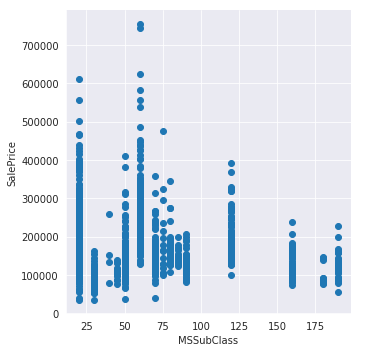

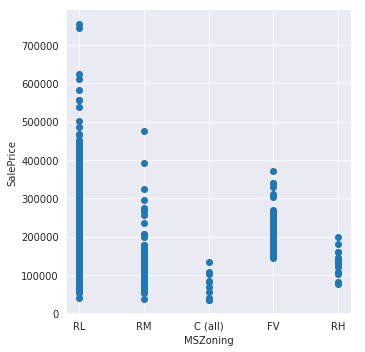

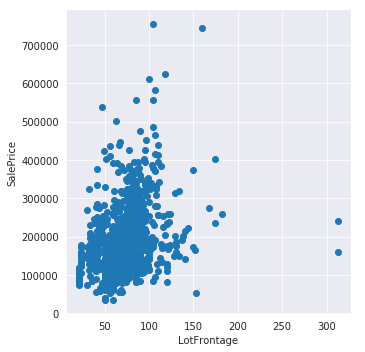

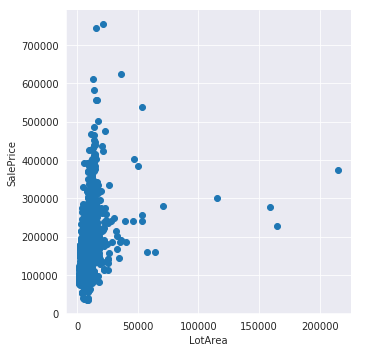

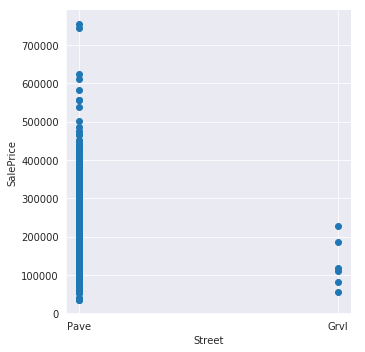

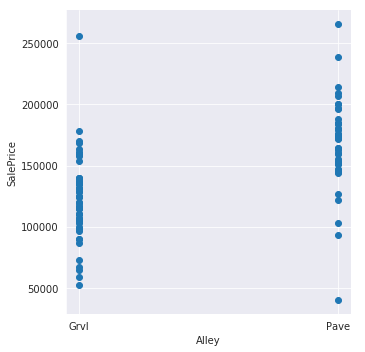

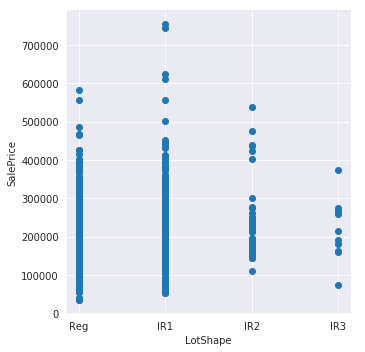

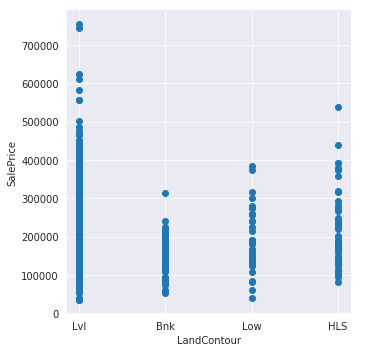

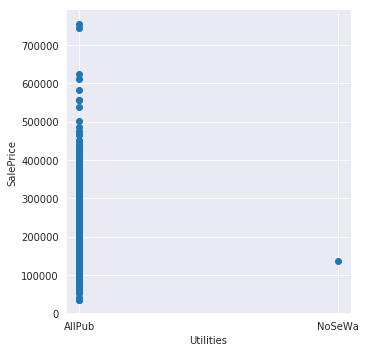

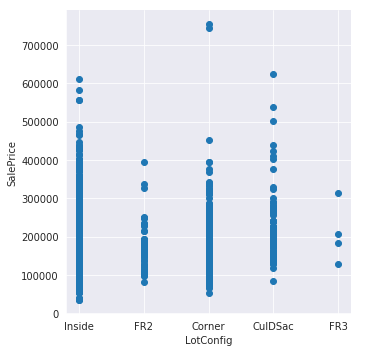

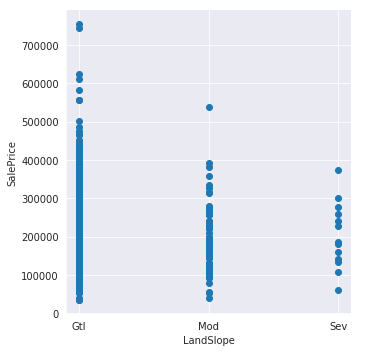

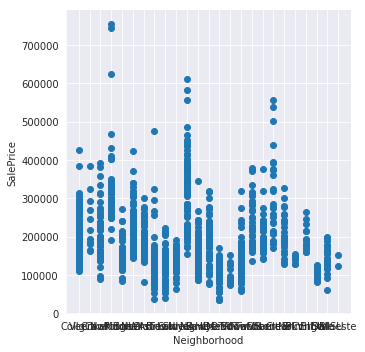

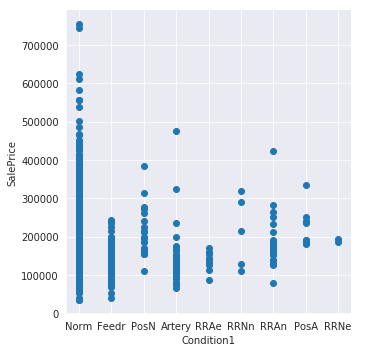

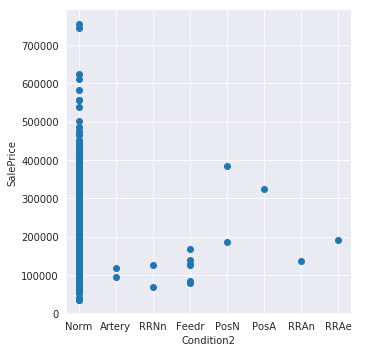

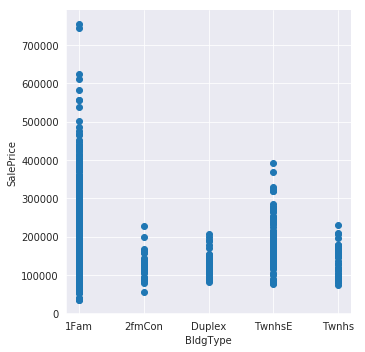

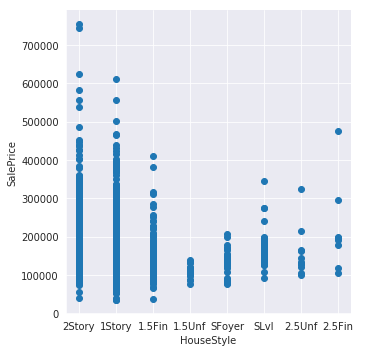

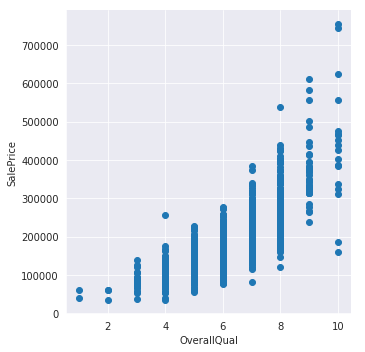

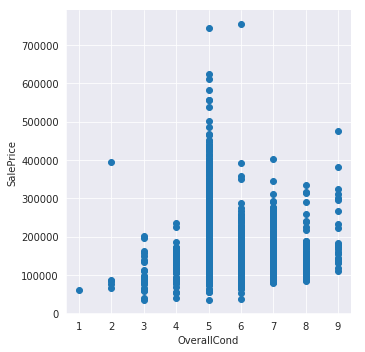

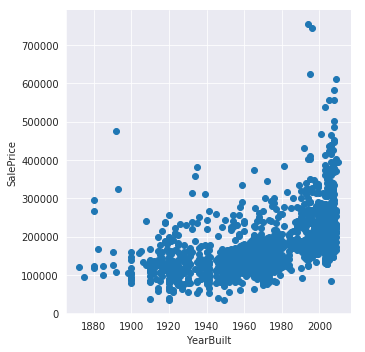

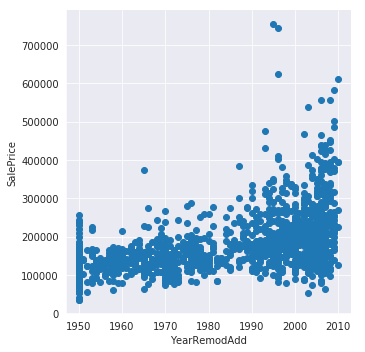

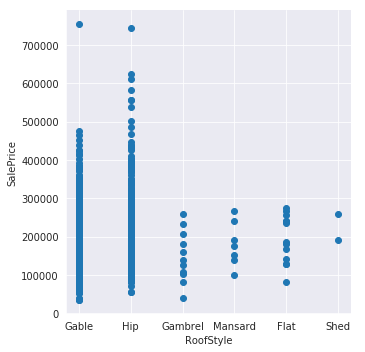

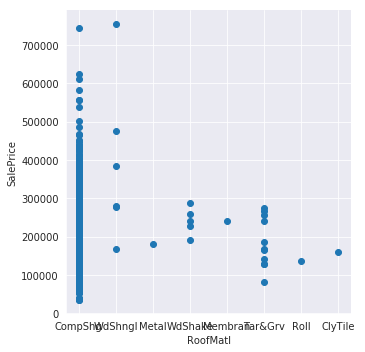

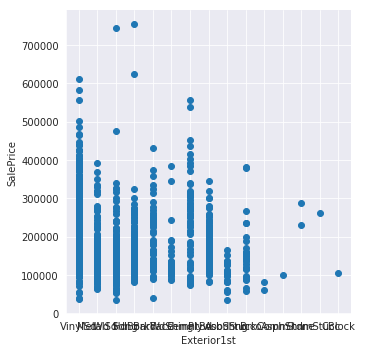

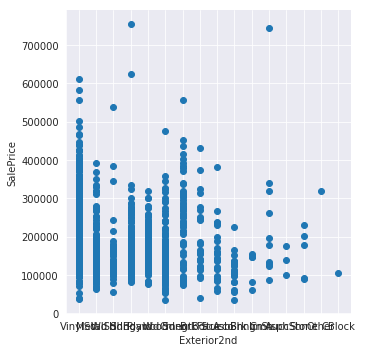

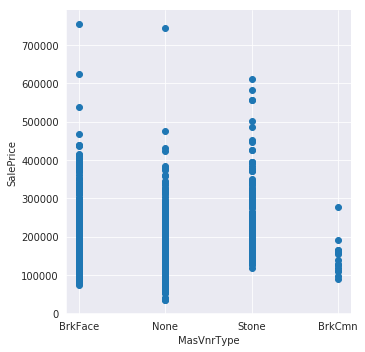

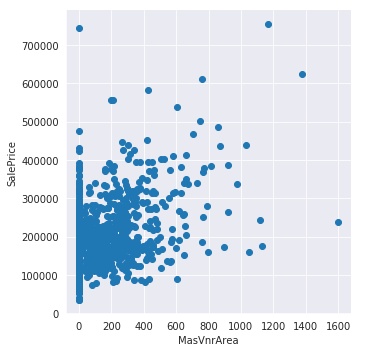

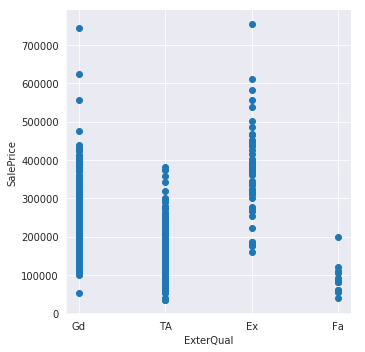

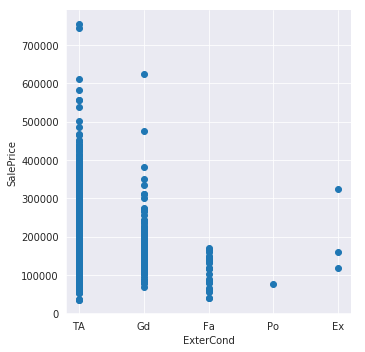

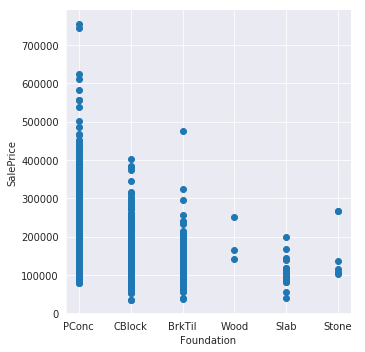

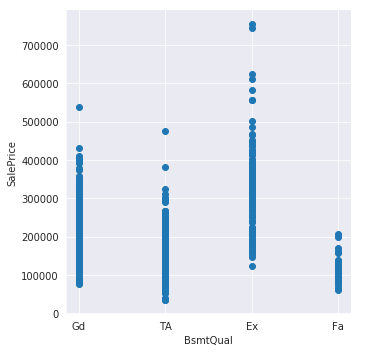

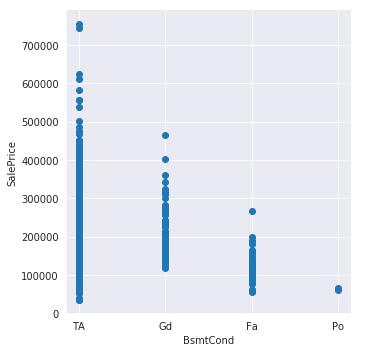

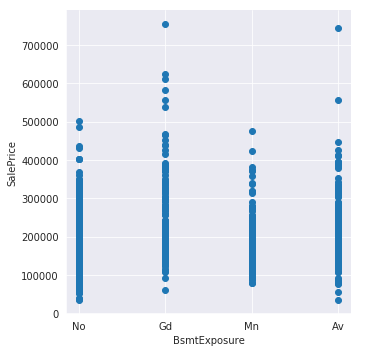

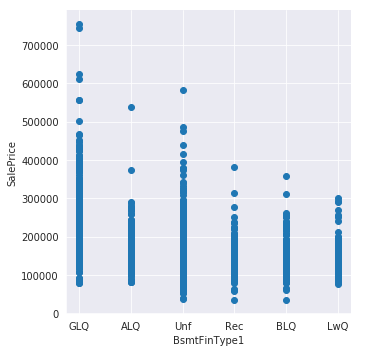

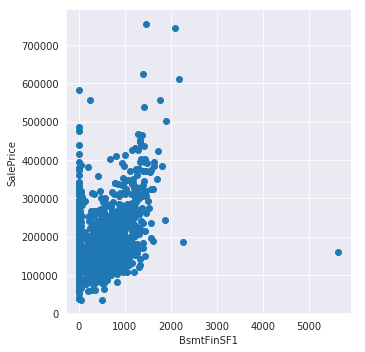

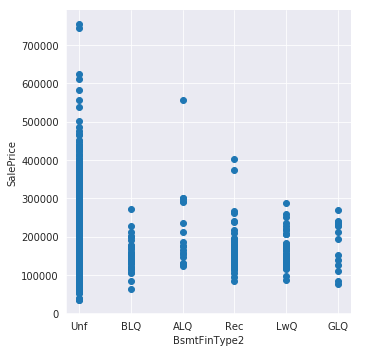

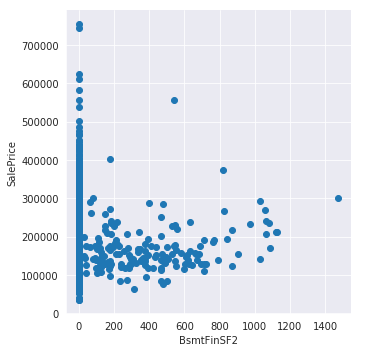

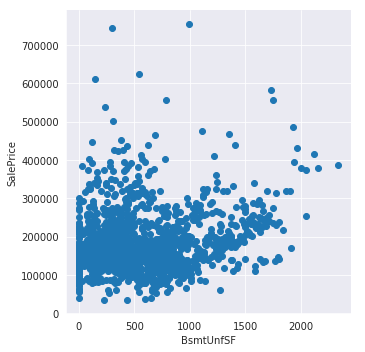

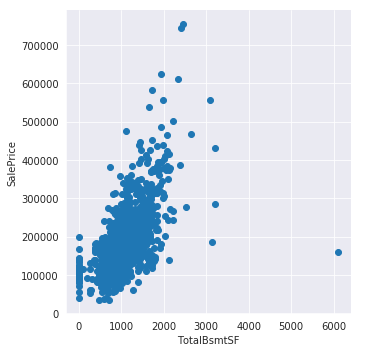

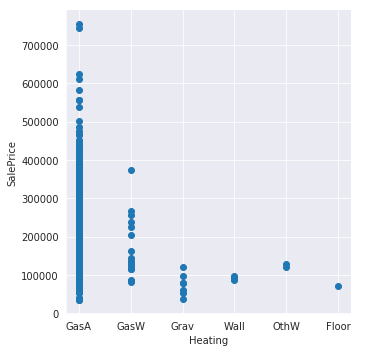

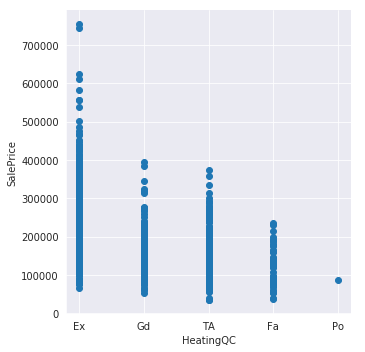

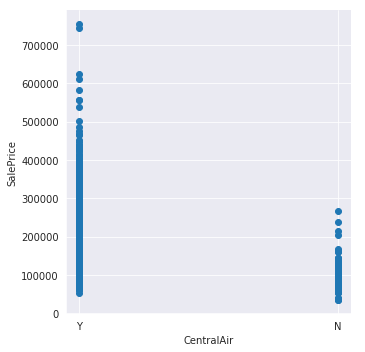

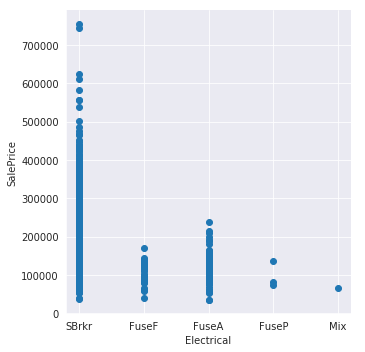

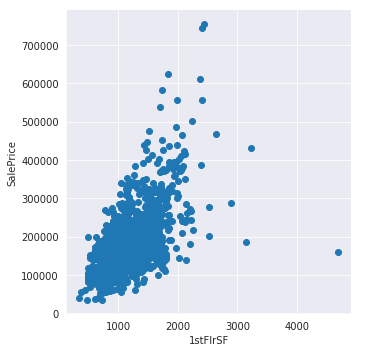

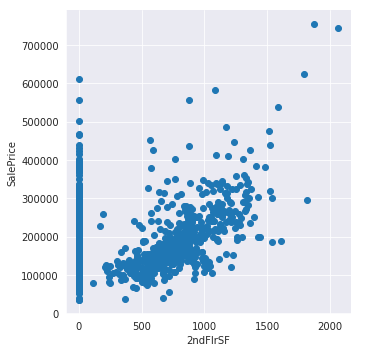

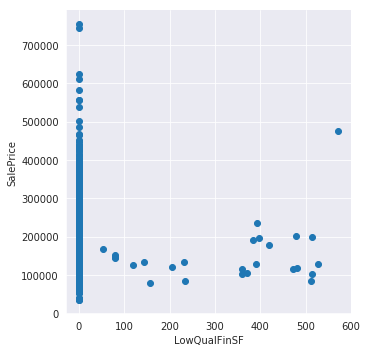

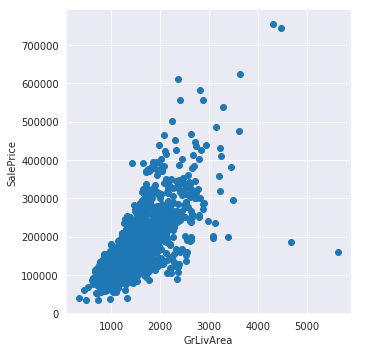

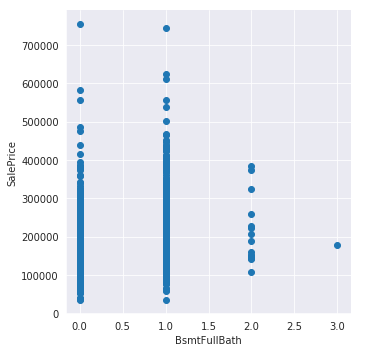

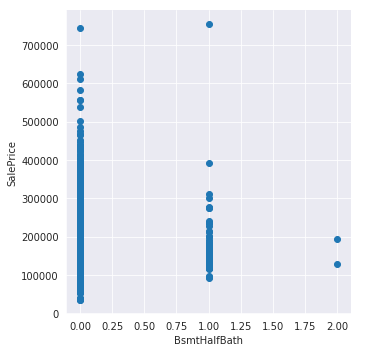

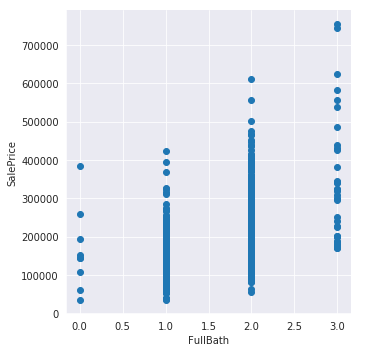

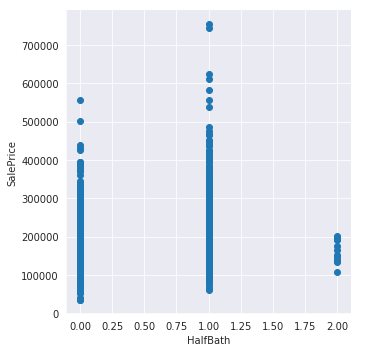

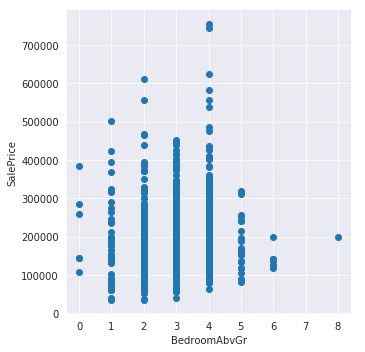

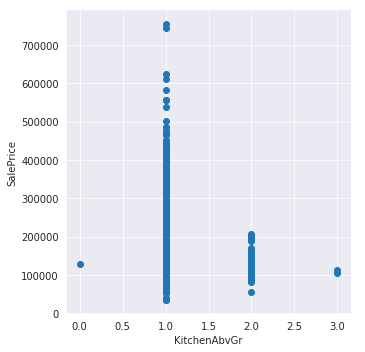

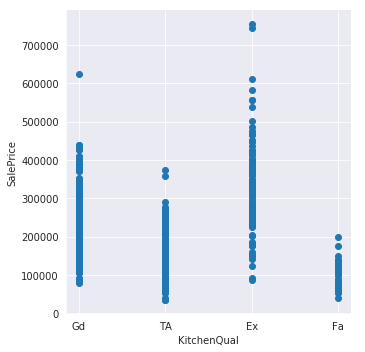

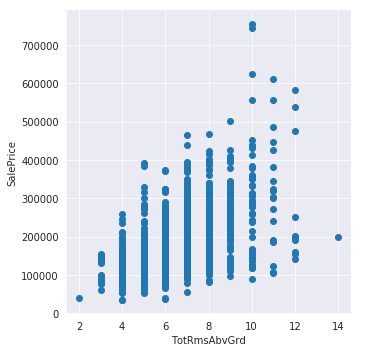

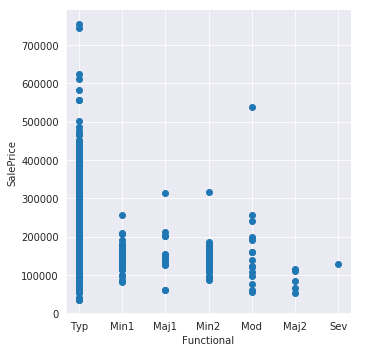

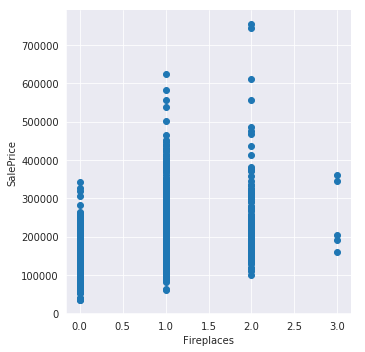

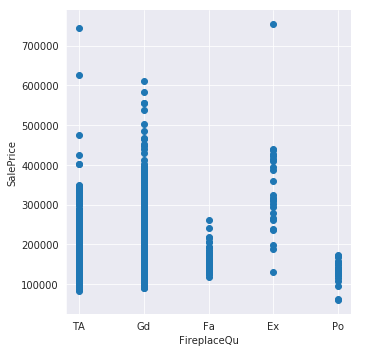

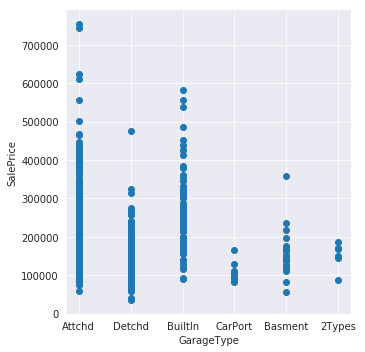

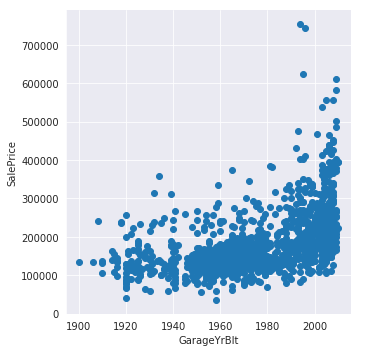

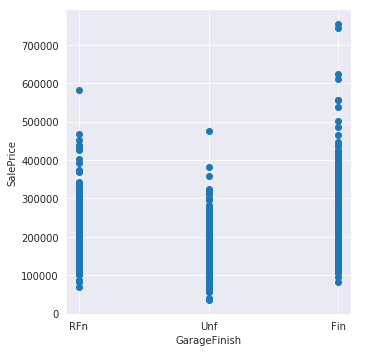

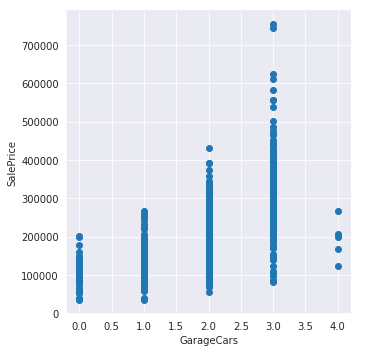

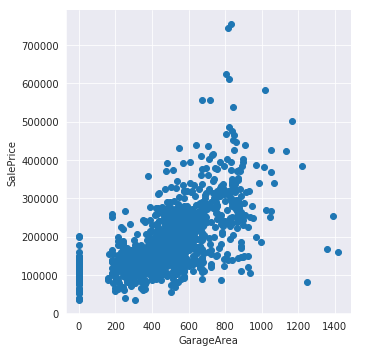

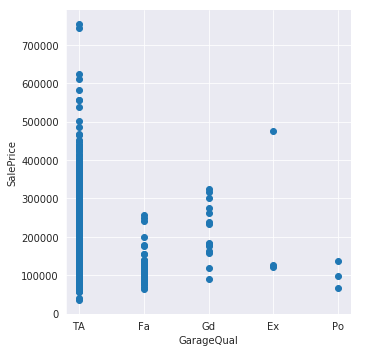

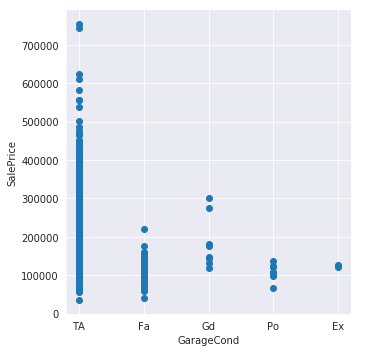

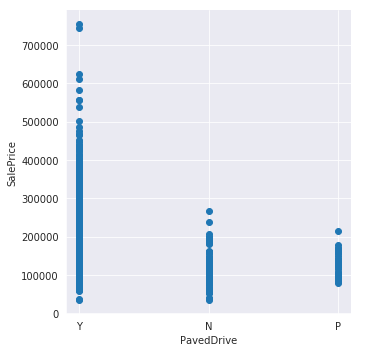

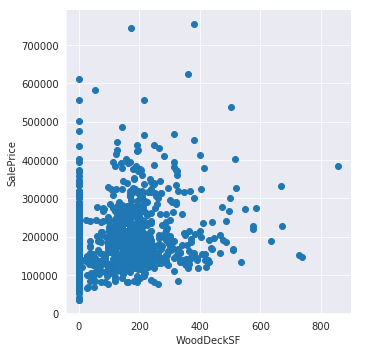

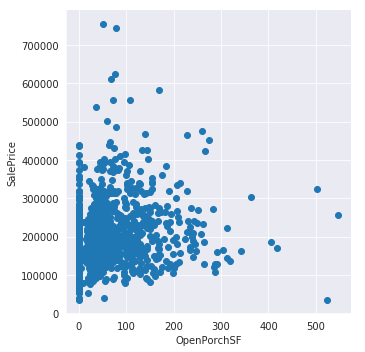

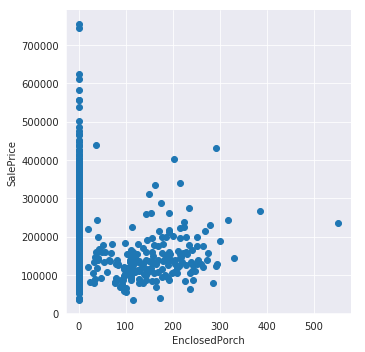

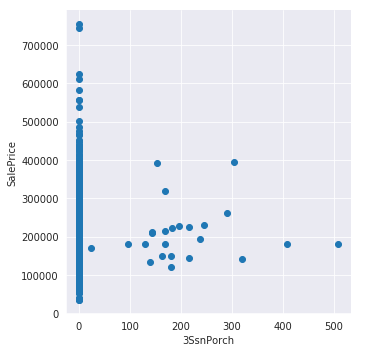

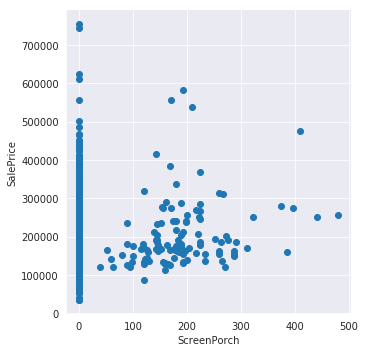

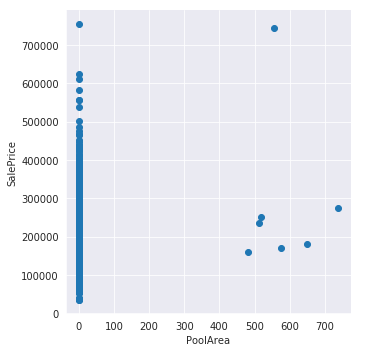

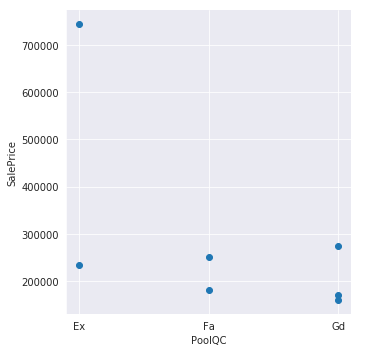

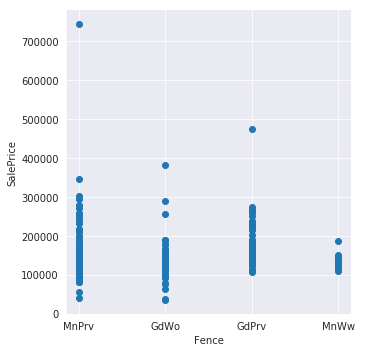

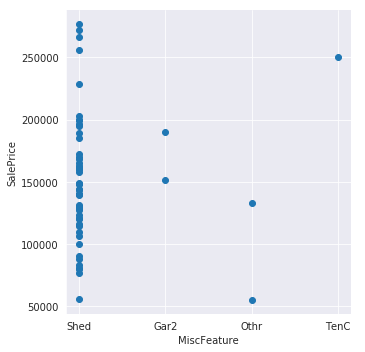

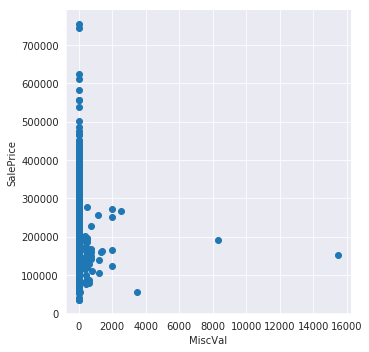

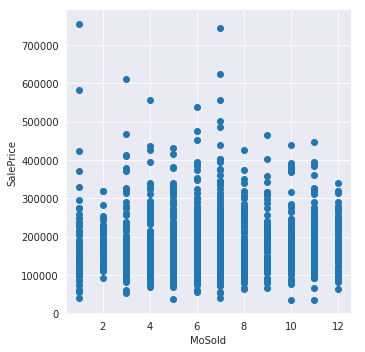

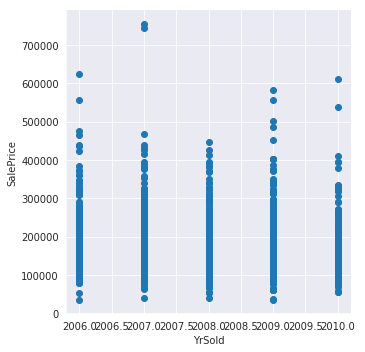

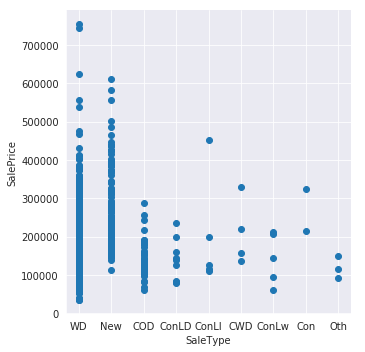

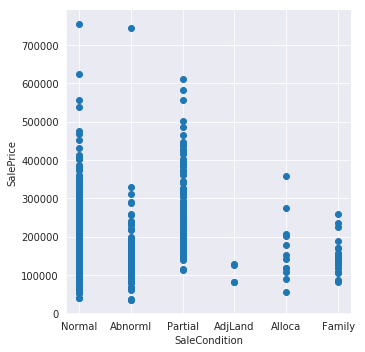

In [4]:
# Scatter plots of variables v/s SalePrice
for i in range(traindf.shape[1] - 1):
    sns.set_style("darkgrid")
    sns.FacetGrid(traindf, hue = None, height = 5)\
        .map(plt.scatter, traindf.columns[i], "SalePrice")\
        .add_legend()
    plt.show()

MSSubClass          AxesSubplot(0.125,0.125;0.0175339x0.755)
LotFrontage      AxesSubplot(0.146041,0.125;0.0175339x0.755)
LotArea          AxesSubplot(0.167081,0.125;0.0175339x0.755)
OverallQual      AxesSubplot(0.188122,0.125;0.0175339x0.755)
OverallCond      AxesSubplot(0.209163,0.125;0.0175339x0.755)
YearBuilt        AxesSubplot(0.230204,0.125;0.0175339x0.755)
YearRemodAdd     AxesSubplot(0.251244,0.125;0.0175339x0.755)
MasVnrArea       AxesSubplot(0.272285,0.125;0.0175339x0.755)
BsmtFinSF1       AxesSubplot(0.293326,0.125;0.0175339x0.755)
BsmtFinSF2       AxesSubplot(0.314367,0.125;0.0175339x0.755)
BsmtUnfSF        AxesSubplot(0.335407,0.125;0.0175339x0.755)
TotalBsmtSF      AxesSubplot(0.356448,0.125;0.0175339x0.755)
1stFlrSF         AxesSubplot(0.377489,0.125;0.0175339x0.755)
2ndFlrSF         AxesSubplot(0.398529,0.125;0.0175339x0.755)
LowQualFinSF      AxesSubplot(0.41957,0.125;0.0175339x0.755)
GrLivArea        AxesSubplot(0.440611,0.125;0.0175339x0.755)
BsmtFullBath     AxesSub

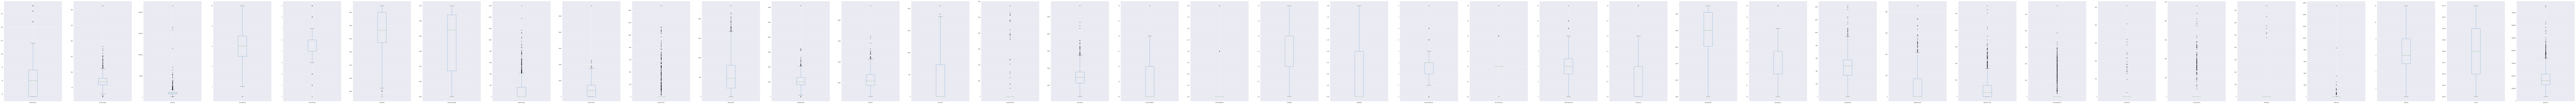

In [5]:
# Box plots of each individual variable
traindf.plot(kind = 'box', subplots = True, figsize = (400, 16))

# Model Building

## Baseline Model

In [6]:
median = traindft['SalePrice'].median()
for i in testdft.index:
    testdft.loc[i, 'SalePrice'] = median

## Linear Regression

TRAINING
--------
Root Mean Square Error (Training): 27494.731059140944
R-square Score (Training): 0.8826958704345871
Residual v/s Fitted Plot
count      1082.000000
mean     185354.588725
std       75456.934240
min       21055.606370
25%      128491.936127
50%      172208.832450
75%      226085.266271
max      579849.800504
dtype: float64


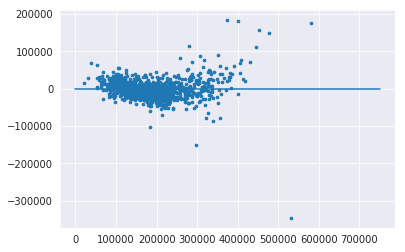

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lrtraindata, lrtrainanswers = traindft.drop(['SalePrice'], axis = 1), traindft.loc[:, 'SalePrice']
print('TRAINING')
print('--------')
# making model
lrmodel = LinearRegression()
# fitting data into model
lrmodel.fit(lrtraindata, lrtrainanswers)
# predicting on train data
lrtrainpredictions = lrmodel.predict(lrtraindata)
# calculating train statistics
lrtrainmse = mean_squared_error(lrtrainanswers, lrtrainpredictions)
lrtrainr2 = r2_score(lrtrainanswers, lrtrainpredictions)
print('Root Mean Square Error (Training):', np.sqrt(lrtrainmse))
print('R-square Score (Training):', lrtrainr2)
print('Residual v/s Fitted Plot')
print(pd.Series(lrtrainpredictions).describe())
plt.scatter(lrtrainpredictions, lrtrainanswers - lrtrainpredictions, s = 7)
plt.plot([0, 750000], [0, 0])
plt.show()

### Inferences
    The graph shows a slight U shape. This means there is hint of polynomial behaviour.


## Quadratic Regression

TRAINING
--------
Root Mean Square Error (Training): 2.5590243134694887e-05
R-square Score (Training): 1.0
count      1082.000000
mean     185354.588725
std       80314.435059
min       35310.999968
25%      131999.999993
50%      165075.000000
75%      218907.499995
max      755000.000188
dtype: float64


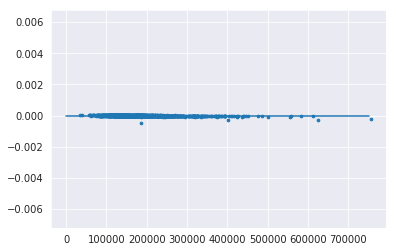

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
qrtraindata, qrtrainanswers = traindft.drop(['SalePrice'], axis = 1), traindft.loc[:, 'SalePrice']
# setting data up to polynomial of given degree
qrpolytraindata = PolynomialFeatures(degree = 2).fit_transform(qrtraindata)
# making model
qrmodel = LinearRegression()
# fitting data into model
qrmodel.fit(qrpolytraindata, qrtrainanswers)
# predicting on training data
qrtrainpredictions = qrmodel.predict(qrpolytraindata)
# calculating training statistics
qrtrainmse = mean_squared_error(qrtrainpredictions, qrtrainanswers)
qrtrainr2 = r2_score(qrtrainpredictions, qrtrainanswers)
print('TRAINING')
print('--------')
print('Root Mean Square Error (Training):', np.sqrt(qrtrainmse))
print('R-square Score (Training):', qrtrainr2)
print(pd.Series(qrtrainpredictions).describe())
plt.scatter(qrtrainpredictions, qrtrainanswers - qrtrainpredictions, s = 7)
plt.plot([0, 750000], [0, 0])
plt.show()

   ### Inferences
    The relationship is indeed polynomial, confirmed by better r2 values and low error. But this is a wonderful example of overfitting.

## Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
qrscores = cross_val_score(qrmodel, qrpolytraindata, qrtrainanswers, cv = ShuffleSplit(n_splits = 10, test_size = 0.4, random_state = 0))
print('QR Accuracy: (', int(qrscores.mean() * 100), ' +/- ', int(qrscores.std() * 200), ') %', sep = '')
lrscores = cross_val_score(lrmodel, lrtraindata, lrtrainanswers, cv = ShuffleSplit(n_splits = 100, test_size = 0.4, random_state = 0))
print('LR Accuracy: (', int(lrscores.mean() * 100), ' +/- ', int(lrscores.std() * 200), ') %', sep = '')

QR Accuracy: (-5566 +/- 13173) %
LR Accuracy: (83 +/- 6) %


# Predicting on testing dataset

In [10]:
qrtestdata = testdft.drop(['SalePrice'], axis = 1)
# setting data up to polynomial of given degree
qrpolytestdata = PolynomialFeatures(degree = 2).fit_transform(qrtestdata)
# predicting on testing data
qrtestpredictions = qrmodel.predict(qrpolytestdata)
pd.Series(qrtestpredictions).describe()

count    1.108000e+03
mean     3.646941e+05
std      3.662567e+06
min     -1.843748e+07
25%      8.885411e+04
50%      1.915019e+05
75%      2.883677e+05
max      1.014691e+08
dtype: float64

In [11]:
# loading data
lrtestdata = testdft.drop(['SalePrice'], axis = 1)
# predicting on testing data
lrtestpredictions = lrmodel.predict(lrtestdata)
pd.Series(lrtestpredictions).describe()

count      1108.000000
mean     182107.712922
std       77388.221272
min        5989.874343
25%      127899.349092
50%      164611.806815
75%      221256.205107
max      626542.845042
dtype: float64

In [12]:
traindf['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Concluding statement
    Due to overfitting, polynomial regression gives good r2 score for training, but is poor for testing, as is seen by the large standard deviation. Linear regression gives good score for training, and has identical properties when compared to the training set.